In [1]:
import anndata as ad
import numpy as np
import scipy
import pandas as pd
import torch
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
adata = ad.read_h5ad("/Users/apple/Desktop/KB/data/Shaffer_cancer/Shaffer_cancer.h5ad")

In [16]:
adata.shape

(23024, 2000)

In [17]:
adata.obs["clone_id"] = adata.obs["Lineage"]

#### check the distribution of lineage size

In [18]:
adata.obs["clone_id"].value_counts()

clone_id
349    1041
389    1036
527     672
22      548
447     451
       ... 
122       5
134       5
249       5
233       5
464       5
Name: count, Length: 558, dtype: int64

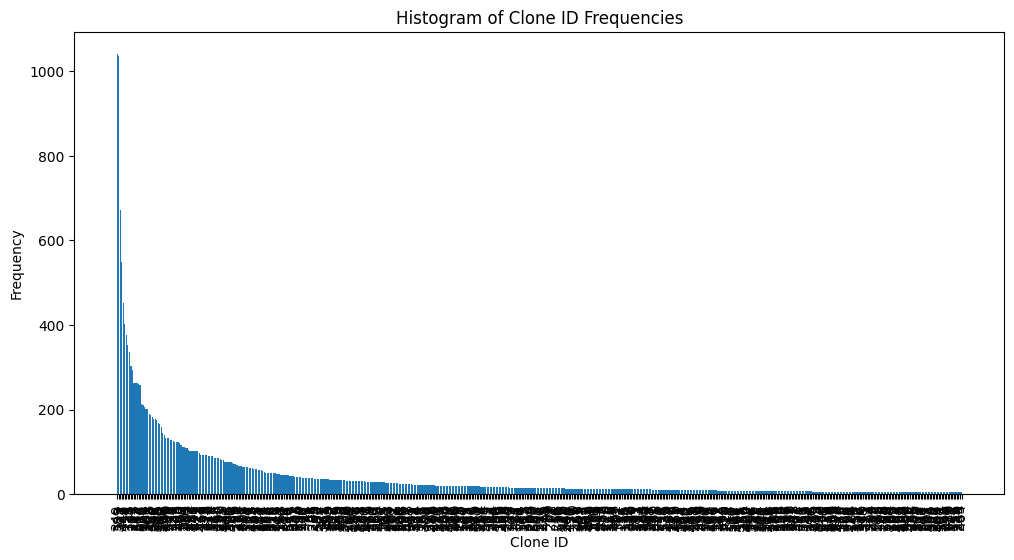

In [11]:
# Count the occurrences of each unique clone_id
clone_counts = adata.obs["clone_id"].value_counts()

# Plot the histogram (bar chart)
plt.figure(figsize=(12, 6))
plt.bar(clone_counts.index.astype(str), clone_counts.values)

# Customize plot
plt.xlabel("Clone ID")
plt.ylabel("Frequency")
plt.title("Histogram of Clone ID Frequencies")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [9]:
print("First few values in adata.X:\n", adata.X[:5])

First few values in adata.X:
 [[-0.13195543  2.29849025  0.69785342 ...  1.83816508 -0.00902942
  -0.00659037]
 [-0.13195543 -0.30385797  0.5234071  ... -0.43526101 -0.00902942
  -0.00659037]
 [-0.13195543  0.38854522 -0.6853462  ... -0.43526101 -0.00902942
  -0.00659037]
 [-0.13195543  1.23168982  0.7518636  ... -0.43526101 -0.00902942
  -0.00659037]
 [-0.13195543  1.70938899 -0.54633223 ... -0.43526101 -0.00902942
  -0.00659037]]


In [19]:
adata.X = adata.X.astype('float32')

In [20]:
adata.write("shaffer_23024_2000.h5ad")